### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df_boston = pd.read_csv('boston_housing.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(f'Total Row : {df_boston.shape[0]}')
print(f'Total Column : {df_boston.shape[1]}')

Total Row : 506
Total Column : 14


### Handling Outliers

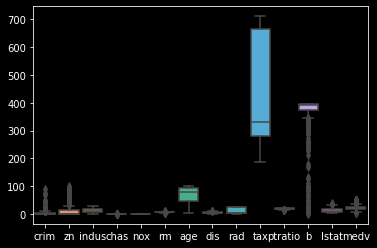

In [4]:
sns.boxplot(data=df_boston)
plt.show()

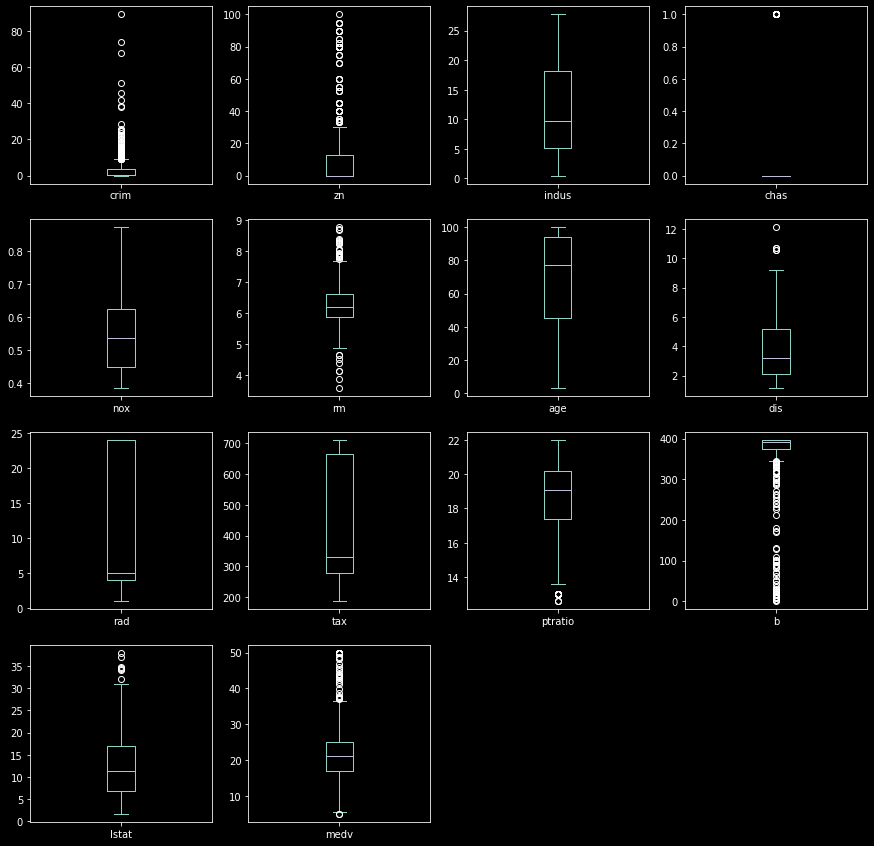

In [5]:
df_boston.plot(kind='box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

### Using IQR

In [6]:
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)
IQR = Q3-Q1
print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [7]:
df_boston_clear_iqr = df_boston[~((df_boston < (Q1-1.5*IQR)) | (df_boston > (Q3+1.5*IQR))).any(axis=1)]

In [8]:
print(f'Before using IQR Method : {df_boston.shape[0]}')
print(f'After using IQR Method : {df_boston_clear_iqr.shape[0]}')

Before using IQR Method : 506
After using IQR Method : 268


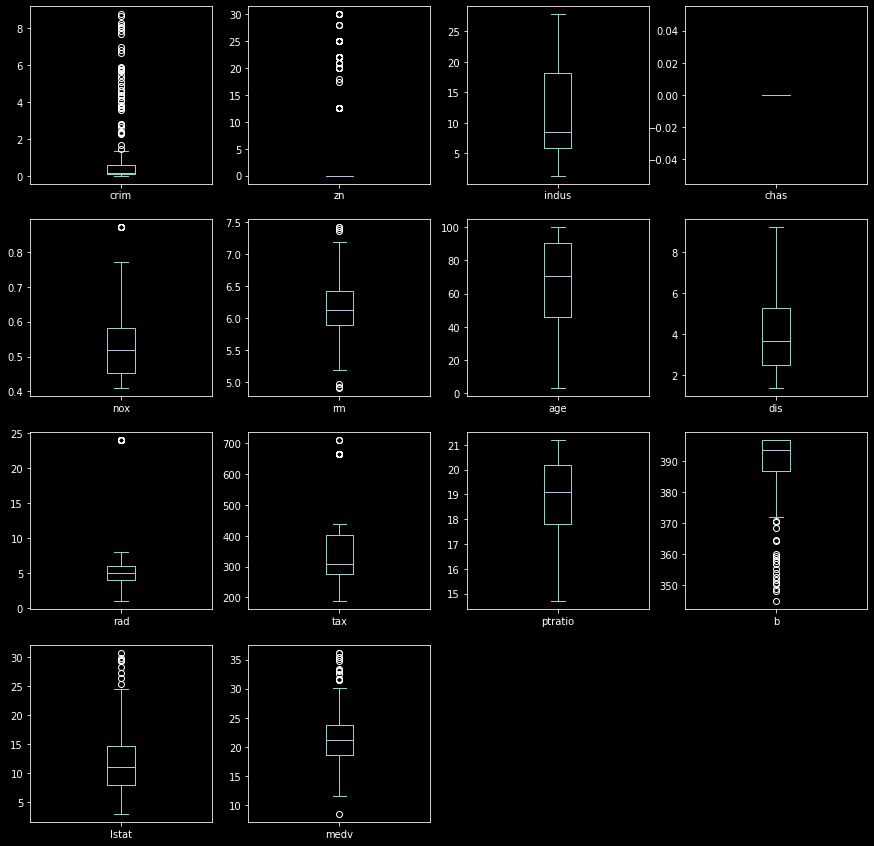

In [10]:
df_boston_clear_iqr.plot(kind='box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

and still has outliers

In [11]:
for column in df_boston:
    q1 = df_boston[column].quantile(0.25)
    q3 = df_boston[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    new_df = df_boston.loc[(df_boston[column] > fence_low) & (df_boston[column] < fence_high)]

In [12]:
print(f'Before using IQR Method : {df_boston.shape[0]}')
print(f'After using IQR Method : {new_df.shape[0]}')

Before using IQR Method : 506
After using IQR Method : 466


### Using Z-score

In [13]:
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(df_boston[df_boston.columns]))

threshold(z,df_boston[df_boston.columns])

With threshold 3.0 data loss is 17.98%
With threshold 3.2 data loss is 15.81%
With threshold 3.4 data loss is 13.83%
With threshold 3.6 data loss is 11.66%
With threshold 3.8 data loss is 3.56%
With threshold 4.0 data loss is 1.38%
With threshold 4.2 data loss is 1.19%
With threshold 4.4 data loss is 1.19%
With threshold 4.6 data loss is 0.99%
With threshold 4.8 data loss is 0.99%


In [15]:
df_boston_clear_z = df_boston[(z < 3.0).all(axis=1)]

In [16]:
print(f'Before using Z-Score : {df_boston.shape[0]}')
print(f'After using Z-Score: {df_boston_clear_z.shape[0]}')

Before using Z-Score : 506
After using Z-Score: 415


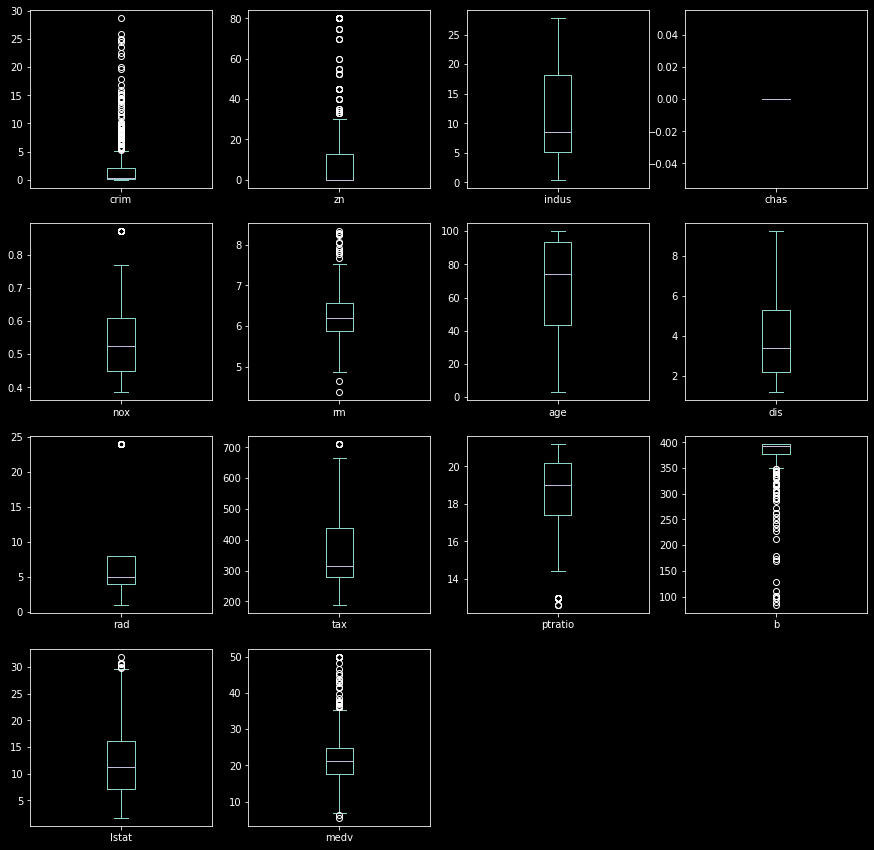

In [17]:
df_boston_clear_z.plot(kind='box', subplots = True, layout = (4,4), figsize = (15,15))
plt.show()

### Feature Selection

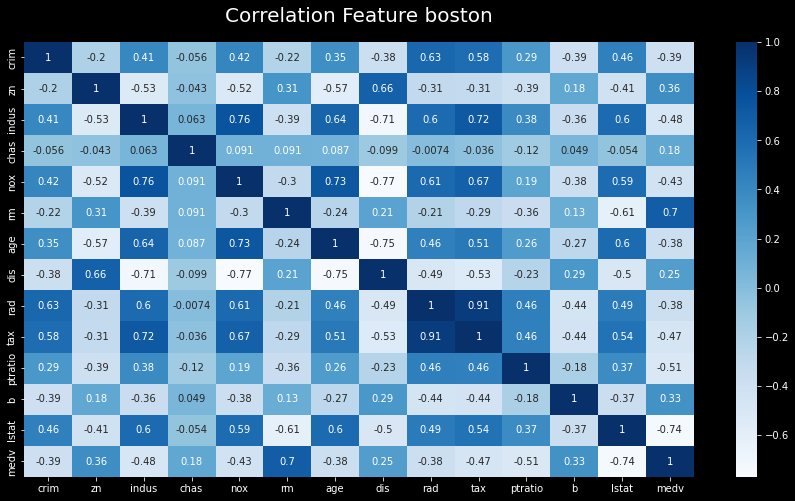

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df_boston.corr(), annot=True, cmap='Blues')
plt.title('Correlation Feature boston', size=20, pad=20)
plt.show()

Text(0.5, 1.0, 'Correlation Factors Heat Map')

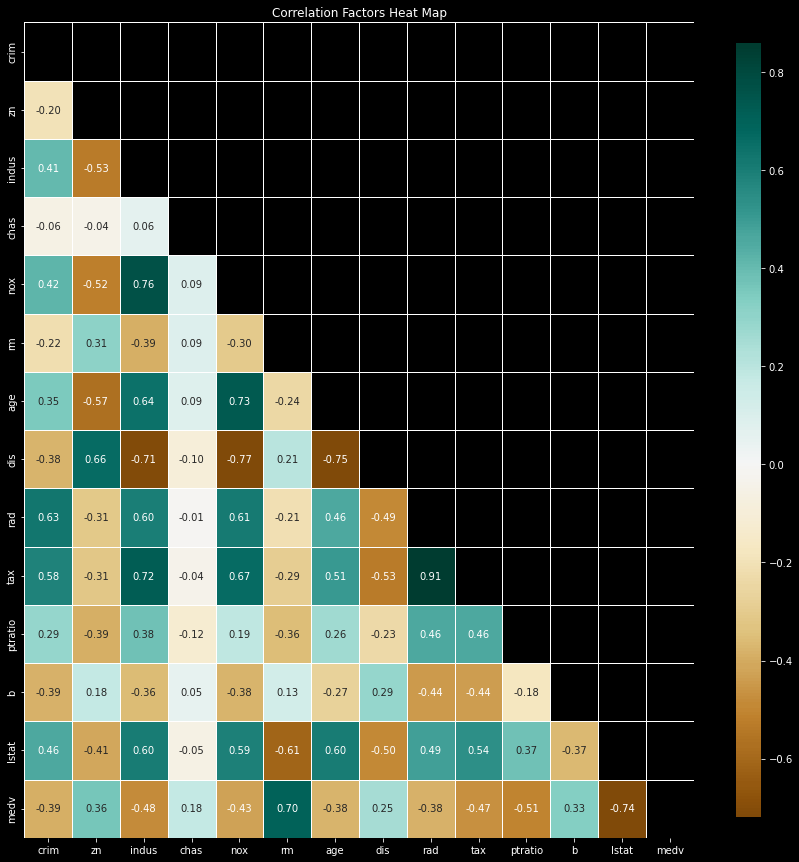

In [22]:
import klib
klib.corr_plot(df_boston, annot=True, figsize = (15,15)).set_title('Correlation Factors Heat Map')